In [1]:
import pandas as pd
import sagemaker
import boto3
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import seaborn as sns
import s3fs
import csv

In [2]:
Netflix = pd.read_csv ("C:/Users/Summe/Documents/GitHub/Group-Project-/Data/Netflix_titles.csv")

In [3]:
Hulu = pd.read_csv ("C:/Users/Summe/Documents/GitHub/Group-Project-/Data/Hulu.csv")

In [4]:
Netflix.shape

(5850, 15)

In [5]:
Hulu.shape

(2398, 15)

In [6]:
# Netflix

Text(0, 0.5, 'Review Count')

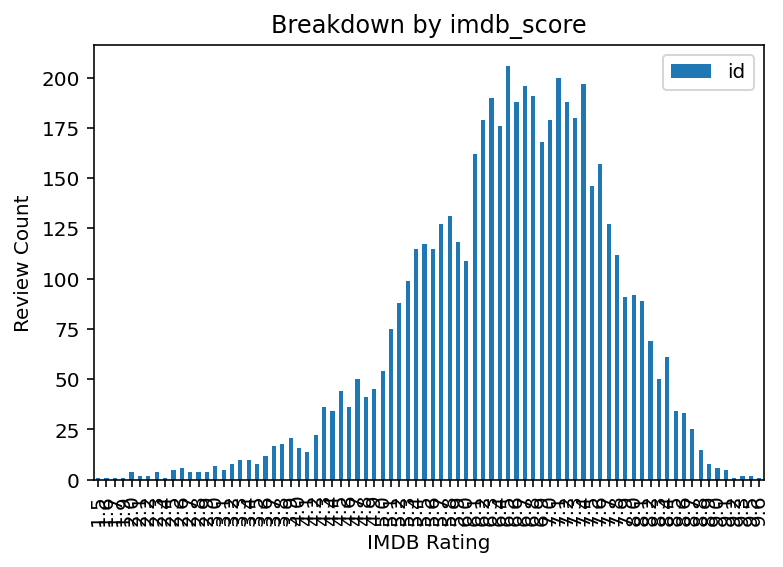

In [7]:
Netflix[["imdb_score", "id"]].groupby("imdb_score").count().plot(
    kind="bar", title="Breakdown by imdb_score"
)
plt.xlabel("IMDB Rating")
plt.ylabel("Review Count")

In [8]:
# Hulu

Text(0, 0.5, 'Review Count')

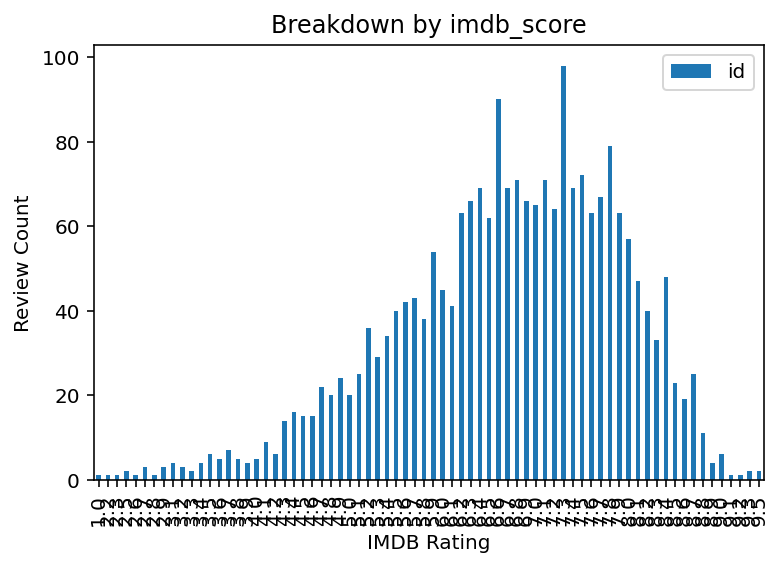

In [9]:
Hulu[["imdb_score", "id"]].groupby("imdb_score").count().plot(
    kind="bar", title="Breakdown by imdb_score"
)
plt.xlabel("IMDB Rating")
plt.ylabel("Review Count")

In [10]:
# Combine data sets

In [11]:
Netflix_Hulu = pd.concat([Netflix, Hulu], ignore_index=True, sort=False)

In [12]:
Netflix_Hulu.head(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [13]:
Netflix_Hulu.shape

(8248, 15)

In [14]:
#sns.countplot(data=Netflix_Hulu, x="imdb_score", hue="id")

In [15]:
df_grouped_by = Netflix_Hulu.groupby(["id", "imdb_score"])[["id", "imdb_score"]]
df_balanced = df_grouped_by.apply(lambda x: x.sample(df_grouped_by.size().min()).reset_index(drop=True))
df_balanced.shape

(7529, 2)

In [16]:
 # sns.countplot(data=df_balanced, x="imdb_score", hue="id")

In [18]:
df_balanced

,,,id,imdb_score
id,imdb_score,,,
tm1000037,5.4,0,tm1000037,5.4
tm1000070,6.6,0,tm1000070,6.6
tm1000147,4.9,0,tm1000147,4.9
tm100015,6.2,0,tm100015,6.2
tm1000185,5.1,0,tm1000185,5.1
...,...,...,...,...
ts98316,7.2,0,ts98316,7.2
ts98353,6.2,0,ts98353,6.2
ts987,7.4,0,ts987,7.4
